# Group Project

*By Theodore Nguyen, Monica Phyo, and Angela Tang*

## Group Contributions Statement

All of us worked on data acquisition and data preparation. We devised and made all the data tables/figures together. We also worked on feature selection and did the final discussion together.

Theodore led the culmen length/depth by island discussion in the data exploration section. He also coded the support vector machine and discussed its performance. He also worked on the decision tree visualization and took care of comments and docstrings.

Monica led the discussion for culmen length and depth ratios in the data exploration section. She wrote up the feature selection discussions. She also led the logistic regression model, its visualization and discussion.

Angela worked on the body mass and flipper length discussion in the data exploration section. She also described the decision tree model and discussed its performance. She was also responsible for the final discussion write-up.

# Data Acquisition

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
penguins = pd.read_csv("palmer_penguins.csv")
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Exploratory Analysis

## Data Preparation

We decided to drop the following columns: studyName, Sample Number, Region, Stage, Individual ID, Clutch Completion, Date Egg, and Comments because they were not physiological traits that were going to be helpful in determining the species of the penguins. We decided not to include the Delta columns because the goal of this project is to be able to determine the penguins species without too much effort in obtaining this data.

In [34]:
#Look at just the Species, Island, Culmen Length, Culmen Depth, Flipper Length, Body Mass, and Sex Columns
penguins = penguins.drop(["studyName", "Sample Number", "Region", "Stage", "Individual ID", "Clutch Completion",
            "Date Egg", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Comments"], axis = 1)

#Shorten the species names to Adelie, Gentoo, and Chinstrap
penguins["Species"] = penguins["Species"].str.split().str.get(0)

#Drop the one row where Sex was recorded as "."
penguins = penguins[penguins["Sex"] != "."]

#Drop rows that include NaN 
penguins = penguins.dropna(subset = ["Sex"])
penguins.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Tables and Plots

First, we define a function called penguin_summary_table that will return a table of mean data values grouped by certain criteria. We can explore how the mean values vary by each group. The table outputs of this function will help us learn more about the penguin dataset. 

In [35]:
def penguin_summary_table(group_cols, value_cols):
    """
    Displays a summary table of the averages of value_cols grouped by group_cols.
    
    Parameters
    ----------
    group_cols : list of strings, columns to be grouped
    value_cols : list of strings, columns to be analyzed
    
    Return
    ----------
    pandas.DataFrame
    """
    
    return penguins.groupby(group_cols)[value_cols].mean().round(2)

### Culmen Length and Culmen Depth, Grouped by Species and Sex

In [36]:
summary = penguin_summary_table(["Species","Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)"])
summary

Culmen Length (mm)  Culmen Depth (mm)
Species   Sex                                          
Adelie    FEMALE               37.26              17.62
          MALE                 40.39              19.07
Chinstrap FEMALE               46.57              17.59
          MALE                 51.09              19.25
Gentoo    FEMALE               45.56              14.24
          MALE                 49.47              15.72

---
**Discussion of Summary Table**

In general, Adelie has the smallest culmen length no matter the sex, and its length is most varied among the three species. Chinstrap has the longest culmen length when compared within each sex. However, it is important to note that Chinstrap and Gentoo culmen length do not differ much from each other.

On the other hand, Gentoo has the smallest culmen depth no matter the sex, and its depth is most varied among the three species. Chinstrap and Adelie have very similar culmen depths, so the data doesn't provide valuable insight to which species has larger culmen depths. 

In general, males are larger both in culmen length and culmen depth.

---

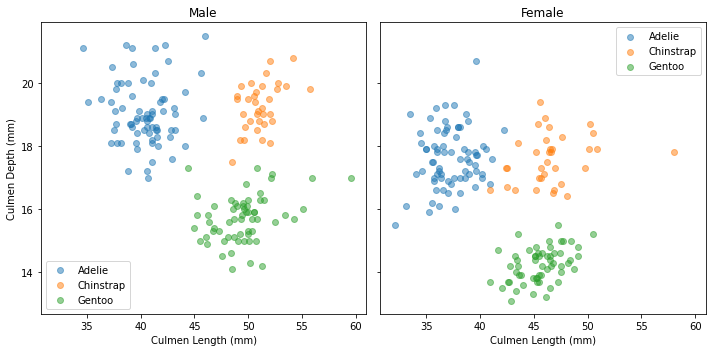

In [37]:
#Store species names (Adelie, Gentoo, Chinstrap)
species = penguins['Species'].unique()

#Create figure of 2 subplots, each of which share the same x and y axes
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharex = True, sharey = True)

#Loop through species
for penguin in species:
    #Create a mask for male penguin
    male_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "MALE")
    
    #Create a mask for female penguin
    female_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "FEMALE")
    
    #Scatterplot of male Culmen Depth vs. Culmen Length
    ax[0].scatter(penguins[male_mask]["Culmen Length (mm)"],
                  penguins[male_mask]["Culmen Depth (mm)"],
                  label = penguin,
                  alpha = 0.5)
    
    #Scatterplot of female Culmen Depth vs. Culmen Length
    ax[1].scatter(penguins[female_mask]["Culmen Length (mm)"],
                  penguins[female_mask]["Culmen Depth (mm)"],
                  label = penguin,
                  alpha = 0.5)

#Set titles, xlabels, and ylabel
ax[0].set(title = "Male",
          xlabel = "Culmen Length (mm)",
          ylabel = "Culmen Depth (mm)")
ax[1].set(title = "Female",
          xlabel = "Culmen Length (mm)")

#Display legends and use tight_layout
ax[0].legend(), ax[1].legend()
plt.tight_layout()

---

**Discussion of Scatter Plot**

This is a scatter plot visualization of the summary table above. Culmen length and depth seem to be great indicators of species, as different species are mostly grouped into separate clusters except for a few outliers. When the dataset was divided by sex, the scatterplot shows more separation between species, thus better classification.

---

Additionally, we were curious if something could be learned from the ratios between culmen length and culmen depth in penguin species. From the summary table above, we calculated the length:depth ratios grouped by species and sex.

In [38]:
#Store sex (MALE, FEMALE)
sex = penguins['Sex'].unique()

#Create column that displays penguin species as well as sex
penguin_col = [penguin+", "+s for penguin in species for s in sex]

#Create column of Culmen Length to Culmen Depth ratios
ratio_col = [summary.loc[penguin,s]["Culmen Length (mm)"]
            /summary.loc[penguin,s]["Culmen Depth (mm)"] for penguin in species for s in sex]

#Create pandas DataFrame to hold previously made columns
len_dep_ratios = pd.DataFrame({"Penguin": penguin_col,
                       "Length : Depth Ratios": ratio_col})

#Display summary table
len_dep_ratios

,Penguin,Length : Depth Ratios
0,"Adelie, MALE",2.117986
1,"Adelie, FEMALE",2.114642
2,"Chinstrap, MALE",2.654026
3,"Chinstrap, FEMALE",2.647527
4,"Gentoo, MALE",3.146947
5,"Gentoo, FEMALE",3.199438


---

**Discussion of Length:Depth Ratio**

We can see that all penguin species have quite distinct length : depth ratios from each other. The ratios are also very similar between different sex of the same species. As a result, length : depth ratio could be a useful criteria for classification between species. In this case, grouping further by sex will not be helpful much. 

---

### Culmen Length and Culmen Depth, Grouped by Species and Island

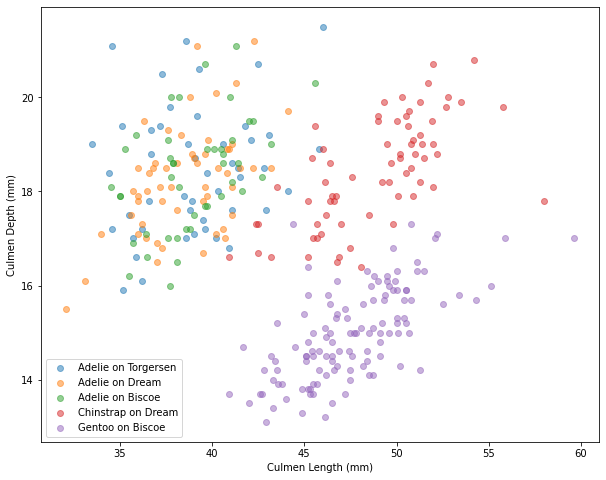

In [39]:
#Create figure
fig, ax = plt.subplots(1, figsize = (10, 8))

#Set xlabel and ylabel
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")

#Store island locations (Dream, Biscoe, Torgersen)
locations = set(penguins["Island"])

#Loop through species and locations
for penguin in species:
    for loc in locations:
        #Create subset of penguins data frame dependent on current penguin and loc
        sub = penguins[(penguins["Species"] == penguin) & (penguins["Island"] == loc)]
        
        #If there does not exist any penguin on loc, continue through next iteration
        if sub.empty: continue
            
        #Scatterplot of Culmen Depth vs. Culmen Length grouped by species and island
        ax.scatter(sub["Culmen Length (mm)"],
                   sub["Culmen Depth (mm)"],
                   label = penguin + " on " + loc,
                   alpha = 0.5)

#Display legend
ax.legend()

---

**Discussion of Scatter Plot**

In the above figure, we again examine a scatter plot of Culmen Length (mm) vs. Culmen Depth (mm), but instead of grouping the data just by Species, we also group the data by Island. Similar to the previous figure, we see three clusters of data: Adelie penguins that have a high culmen depth but low culmen length, Gentoo penguins that have a low culmen depth but high culmen length, and Chinstrap penguins that have both a high culmen depth and culmen length. This figure, however, also groups the data by islands. From the figure, we can see that  Gentoo penguins are only found on Biscoe, Chinstrap penguins are only found on Dream, and Adelie penguins are found on all three islands: Torgersen, Dream, and Biscoe. More importantly, we notice that Adelie penguins all share high culmen depth and low culmen length regardless of the island. Therefore, we can infer that the island has less of an impact on the species type than the culmen depth to culmen length ratios. As a result, through this figure we can confirm that culmen depth and culmen length are significant to predicting penguin species. Thus, these two physiological traits will be important to our modeling in the next section.

---

### Body Mass, Grouped by Species and Sex 

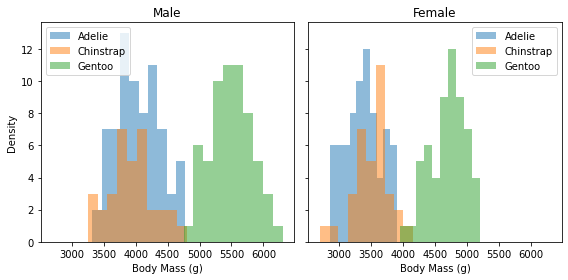

In [40]:
#Create figure of 2 subplots, each of which share the same x and y axes
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex = True, sharey = True)

#Loop through species
for penguin in species:
    #Create a mask for male penguin
    male_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "MALE")
    
    #Create a mask for female penguin
    female_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "FEMALE")
    
    #Histogram of male Body Mass
    ax[0].hist(penguins[male_mask]["Body Mass (g)"],
            label = penguin,
            alpha = 0.5)
    
    #Histogram of female Body Mass
    ax[1].hist(penguins[female_mask]["Body Mass (g)"],
            label = penguin,
            alpha = 0.5)

#Set titles, xlabels, and ylabel
ax[0].set(title = "Male",
          xlabel = "Body Mass (g)",
          ylabel = "Density")
ax[1].set(title = "Female",
          xlabel = "Body Mass (g)",)

#Display legends and use tight_layout
ax[0].legend(), ax[1].legend()
plt.tight_layout()

### Flipper Length, Grouped by Species and Sex

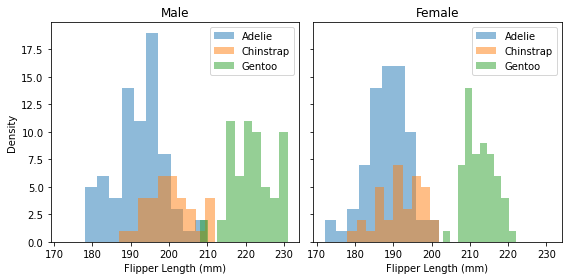

In [41]:
#Create figure of 2 subplots, each of which share the same x and y axes
fig, ax = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

#Loop through species
for penguin in species:
    #Create a mask for male penguin
    male_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "MALE")
    
    #Create a mask for female penguin
    female_mask = (penguins["Species"] == penguin) & (penguins["Sex"] == "FEMALE")
    
    #Histogram of male Flipper Length
    ax[0].hist(penguins[male_mask]["Flipper Length (mm)"],
            label = penguin,
            alpha = 0.5)
    
    #Histogram of female Flipper Length
    ax[1].hist(penguins[female_mask]["Flipper Length (mm)"],
            label = penguin,
            alpha = 0.5)

#Set titles, xlabels, and ylabel
ax[0].set(title = "Male",
          xlabel = "Flipper Length (mm)",
          ylabel = "Density")
ax[1].set(title = "Female",
          xlabel = "Flipper Length (mm)",)

#Display legends and use tight_layout
ax[0].legend(), ax[1].legend()
plt.tight_layout()

---

**Discussion of Histograms**

Body mass and flipper length are mostly positively correlated, with a larger body mass correlating with longer flipper lengths. For both, Gentoo penguins have much larger values, almost completely different from the other two species. For flipper length, there is almost no overlap in values (when looking at the histograms), allowing us to differentiate Gentoo from the other two species based on flipper length alone in most cases. Also, Adelie penguins are the only species with flipper lengths in the lower values, whereas it is more mixed for body mass. 

For both body mass and flipper length, females of all three species have smaller values, thus if we consider body mass or flipper length as a column, we should also consider including sex to prevent more overlap in values between species. For instance, if we have a penguin that has a body mass of 4500 g, it could either be a Chinstrap or Adelie male or a Gentoo female. Thus, knowing the sex would allow us to make a more effective estimate of the species.

---

# Modeling

First, we define a function prep_penguins_data to prepare the data so that all string data values can be converted to integers readable by machine learning algorithms. We then divide the penguins dataset columns into X (predictor variables) and y (target variable).

In [43]:
from sklearn import preprocessing

def prep_penguins_data(data):
    """
    Prepares penguins data frame for machine learning models.
    
    Parameters
    ----------
    data : pandas.DataFrame to be prepared
    
    Return
    ----------
    (X, y) : pandas.DataFrame without Species column, pandas.Series of Species column
    """
    
    #Copy data frame
    df = data.copy()
    
    #Create LabelEncoder
    le = preprocessing.LabelEncoder()
    
    #Encode Sex column in data frame
    df["Sex"] = le.fit_transform(df["Sex"])
    
    #Encode Island column in data frame
    df["Island"] = le.fit_transform(df["Island"])
    
    df["Species"] = le.fit_transform(df["Species"])
    
    #Create X, where X is the data frame without the Species column
    #X serves as the predictor variables
    X = df.drop(["Species"], axis = 1)
    
    #Create y, where y just contains the Species column
    #y serves as the target variable
    y = df["Species"]
    return X,y

### Train and Test Split

In [44]:
from sklearn.model_selection import train_test_split

#Split penguins data into training data and testing data with a 70%/30% ratio, respectively
train, test = train_test_split(penguins, test_size = 0.3)

#Create predictor variables and target variable from training data using data preparation function
X_train, y_train = prep_penguins_data(train)

### Feature Selection

We will first use logistic regression to find out which columns of a dataset are the most relevant for predicting our target variable. This process is called feature selection. A logistic regression model will be used to fit multiple combinations of 3 columns from the training dataset (one qualitative variable and 2 quantitative variables), and the relevancy of each combination is evaluated based on its cross validation score (cv score). 

Our task entails finding a small number of variables that is predictive of penguin species, so this model is particularly useful in choosing the best combination of variables with the best accuracy, or the highest cv score.

We wrote a function to automatically calculate cv scores from a column combination.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_column_scores(cols):
    """
    Trains and evaluates Logistic Regression via crossvalidation on the columns
    of the dataset with select indeces
    
    Parameters
    ----------
    cols : list of strings, columns on which to be trained
    
    Return
    ----------
    float : average of 5 cross validation scores
    """
    
    #Logistic Regression Model
    LR = LogisticRegression(max_iter = 5000)
    
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

Based on our findings from the exploratory analysis, we came up with different variable combinations that could be effective in predicting penguin species. Their cv scores are then calculated using the function above.

In [46]:
#Qualitative features
quals = ["Island", "Sex"]

#Quantitative features
quants = ["Culmen Length (mm)", "Culmen Depth (mm)",
        "Flipper Length (mm)", "Body Mass (g)"]

#Create list of feature combinations
#where each combination contains 1 qualitative feature and 2 quantitative features
combos = [[qual]+[quant1]+[quant2] for qual in quals for quant1 in quants for quant2 in quants if quant1 != quant2]

In [47]:
#Create empty list to store cross validation scores
cv_scores = []
#Set the best cross validation score to be negative infinity
best_cv_score = -np.inf

#Loop through every column combination
for combo in combos:
    #Apply check_column_scores function on combo and add the score to cv_scores
    score = check_column_scores(combo)
    cv_scores.append(score)
    
    #If the most recent score is better than best_cv_score,
    #reassign best_cv_score and assign combo to best_combo
    if cv_scores[-1] > best_cv_score:
        best_cv_score = cv_scores[-1]
        best_combo = combo

#Print the best column combination and its cross validation score
print("Best combo: " + str(best_combo))
print("which produces CV score: " + str(best_cv_score))

Best combo: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
which produces CV score: 0.9871415356151712


From the training results, we see that  ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']  is the best combination of variables to predict our target variable, with the highest cv score of 0.987. 

Since we found out that the ratio of culmen length and depths have such distinct values between species, it makes sense that they are two of the best quantitative predictive features. One would think island would be a better qualitative feature, due to its ability to classify a specie solely based on its location (Adelie on Torgersen). However, sex could be a better option for unseen data, considering that its island location can be changed easily, while sex is an innate characteristic. 

We narrowed down our training data so that only the most relevant combinations stored in best_combo will be used in the upcoming models. 

In [48]:
#Modify X_train to only include the best predictor variables chosen from feature selection
X_train = X_train[best_combo]

### Model 1: Multinomial Logistic Regression

Our first model is multinomial logistic regression, where we will vary the regularization parameter c to improve the performance of the model on unseen test data. Logistic regression is mainly used for classification problems, and in our task, the model will help us classify penguins into their correct species. It uses multiple regression functions that model the probabilities of diffferent categories (for example, the probability that the penguin is an Adelie species).

Regularization improves the model's performance for generalizing what it learned from the training data to new test data. This process prevents the model from overfitting, from paying too much attention to every irregularity in our penguins training data. Our goal is to find the best regularization parameter that will neither overfit nor underfit our data.

First, we set up a range of c parameters that will be used against the logistic regression model. CV scores will be used to determine how well the model predicts our penguins data.

In [49]:
#Setting a range of c parameters to run the model
C_pool=np.linspace(.1,1,20)
best_score=-np.inf
scores = []

#Checking cv scores for every c parameter
for c in C_pool:
    LR1=LogisticRegression(C=c,max_iter=5000)
    scores.append(cross_val_score(LR1,X_train,y_train,cv=5).mean())
    #score=cross_val_score(LR1,X_train,y_train,cv=5).mean()
    if scores[-1]>best_score:
        best_score=scores[-1]
        best_c=c
        
#Print the best c parameter for the model and its cv score
print("best_c=",np.round(best_c,3)," Cross validation score=",best_score)

best_c= 1.0  Cross validation score= 0.9871415356151712


The best c parameter is 1.0, which is interestingly the default c parameter used in logistic regression. Its cv score is 0.987, meaning that the model is predicted to classify 98.7% of new penguins correctly into their species. 

The following will fit our training data to the logistic regression model with our best c parameter. We then test our model on the test data to find out if the model will still work well with unseen data. A big difference in train and test scores indicate overfitting in the model. 

In [50]:
#Fit our training data to the best logistic regression model
LR1 = LogisticRegression(C=best_c, max_iter=5000)
LR1.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [51]:
#Prepping test data
X_test, y_test = prep_penguins_data(test)
X_test = X_test[best_combo]

In [52]:
#Scoring the model on test data
LR1.score(X_test,y_test)

0.98

[Text(0.5, 1.0, 'Best C parameter: 1.0')]

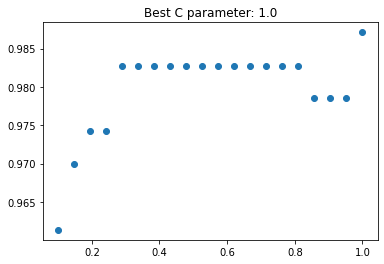

In [53]:
#Create figure
fig, ax = plt.subplots(1)

#Scatterplot of cross validation scores vs. tree depth
ax.scatter(C_pool, scores)

#Set title
ax.set(title = "Best C parameter: " + str(best_c))

The test score for variable combinations  ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']  came out to 0.98, which means that 98% of penguin test data had their species predicted correctly using the Logistic Regression model with the best c parameter (c=1.0). This test score is not much different from our training cv score (0.987), showing that there is no overfitting.

### Model 2: Decision Tree Classifier

We chose to do a decision tree classifier as our second model. For this one we had to determine what was the best depth for our model, i.e. how many decisions could be made. To do this, we tested 30 different depths and picked out the best one to be our model. The end product was a decision tree that could predict a penguin's species from a few yes-or-no questions about the penguin (e.g. is the penguin's culmen length less than 42.3 mm).

We chose to limit the decision tree to decisions made based on a penguin's culmen length and depth and its sex, as before. This let us test further how effective these three characteristics of a penguin were at predicting a penguin's species.

In [54]:
from sklearn import tree

#Cross validate on depths ranging from 1 to 30
N = 30

#Create np.array() to store cross validation scores
scores = np.zeros(N)

#Set the best cross validation score to be negative infinity
best_score = -np.inf

#Loop through depths from 1-30
for d in range(1, N + 1):
    #Decision Tree model with max_depth = d
    T = tree.DecisionTreeClassifier(max_depth = d)
    
    #Store the average of 5 cross validation scores in scores
    scores[d-1] = cross_val_score(T, X_train, y_train, cv = 5).mean()
    
    #If the most recent score is better than best_cv_score,
    #reassign best_score and assign d to best_depth
    if scores[d-1] > best_score:
        best_score = scores[d-1]
        best_depth = d
        
best_depth, best_score

(9, 0.9913968547641072)

[Text(0.5, 1.0, 'Best Depth: 9')]

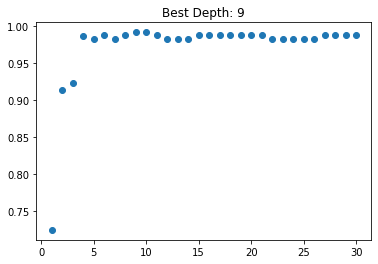

In [55]:
#Create figure
fig, ax = plt.subplots(1)

#Scatterplot of cross validation scores vs. tree depth
ax.scatter(np.arange(1, N + 1), scores)

#Set title
ax.set(title = "Best Depth: " + str(best_depth))

The above code and plot tests and depicts the cross validation scores of different decision tree models with different depths. The greater the depth, the more decisions the decision tree makes. From our experiment, we can see that the depth that resulted in the best score was 9, getting a score of over 0.99. However it looks like all depths greater than 3 produce similar CV scores.

Now we'll fit our model using the best depth to the training set.

In [56]:
#Decision Tree model with max_depth = best_depth chosen from cross validation
T = tree.DecisionTreeClassifier(max_depth = best_depth)

T.fit(X_train, y_train)
T.score(X_train, y_train)

1.0

### Decision Tree Visualization

In [57]:
from sklearn.tree import export_graphviz
#Export Decision Tree model T as dot file
export_graphviz(T, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = list(species),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

#Convert dot file to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#Display image
from IPython.display import Image
Image(filename = 'tree.png')

Our decision tree with max depth 9 is depicted above. It begins by determining whether the penguin has a culmen length less than or equal to 42.3 mm. If so, the tree then determines whether or not the penguin's culmen depth is less than or equal to 14.6 mm. Then if it is, the penguin is classified as Gentoo. If it isn't, then it is classified as Adelie. A similar process is used if the penguin's culmen length is greater than 42.3 mm. It is only on this side of the decision tree that sex is factored in. The purple boxes represent penguins that are either likely (light purple) or almost certainly (dark purple) Gentoo penguins. The same goes for orange boxes and Adelie penguins and green boxes and Chinstrap penguins.

In [59]:
#Evaluate performance of Decision Tree T on test data
T.score(X_test, y_test)

0.95

Our test score came out to 0.95, which is a step down from the cross-validation score of over 0.99, but not by much.

### Model 3: Support Vector Machine

Our third and final machine learning model is the support vector machine. The goal of this model is to identify the most optimal hyperplane that can distinguish between our data points. In our case, since we are analyzing on three penguin features (Sex, Culmen Length, and Culmen Depth), the support vector machine will find the best hyperplane in 3-dimensional space that can distinctly classify the data points. Since the model is working in 3-dimensional space, then the best hyperplane will be a 2-dimensional plane. The most optimal hyperplane is the one that produces the maximum distance between data points of the three features.

In the following code, we employ the support vector machine model from the sklearn module. Similar to how we cross-validated the best depth for a Decision Tree, we cross-validate the best gamma for our support vector machine. In simple terms, the gamma hyperparameter is used for non-linear hyperplanes. The higher the gamma value, the more the model tries to exactly fit the training data set. Therefore, too high of a gamma value leads to overfitting of the training data, and thus leads to poor performance on the test data. In our code, we record 100 gamma values ranging from 0.05 to 5, and we also record the cross-validation scores produced from these gamma values.

In [60]:
from sklearn import svm

#Create np.array() of 100 points between 0.05 to 5, representing different gamma values
gammas = np.linspace(0.05, 5, 100)

#Create empty list to store cross validation scores
scores = []
#Set the best cross validation score to be negative infinity
best_score = -np.inf

#Loop through gammas
for g in gammas:
    #Support Vector Machine Model with gamma = g
    SVM = svm.SVC(gamma = g)
    
    #Store the average of 5 cross validation scores in scores
    scores.append(cross_val_score(SVM, X_train, y_train, cv = 5).mean())
    
    #If the most recent score is better than best_score,
    #reassign best_score and assign g to best_gamma
    if scores[-1] > best_score:
        best_score = scores[-1]
        best_gamma = g
        
best_gamma, best_score

(0.2, 0.974190564292322)

From our cross-validation, we can see that the best gamma value is 0.2 since it produced the best cross validation score of 0.974.

Next, we plot the cross-validation scores against the gamma values.

[Text(0.5, 1.0, 'Best Gamma: 0.2'),
 Text(0.5, 0, 'Gamma'),
 Text(0, 0.5, 'Cross Validation Score')]

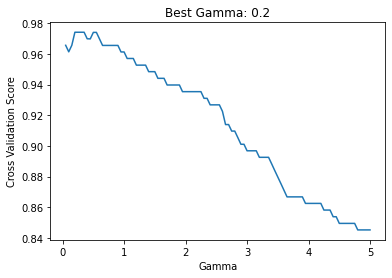

In [61]:
#Create figure
fig, ax = plt.subplots(1)

#Line plot of cross validation scores vs. gamma values
ax.plot(gammas, scores)

#Set title, ylabel, and xlabel
ax.set(title = "Best Gamma: " + str(best_gamma),
      xlabel = "Gamma",
      ylabel = "Cross Validation Score")

From the figure, we can see that after the best cross-validation score peaked at gamma value 0.2, the remaining cross-validation scores get worse as the gamma values increase. This trend agrees with the discussion earlier about how too high of a gamma value leads to overfitting of the data.

Now, after the cross-validation, we create our support vector machine model with the best gamma value of 0.2. Then, we fit and score the model on our training data.

In [62]:
#Support Vector Machine with gamma = best_gamma chosen from cross validation
SVM = svm.SVC(gamma = best_gamma)

SVM.fit(X_train, y_train)
SVM.score(X_train, y_train)

1.0

With a score of 1.0, the support vector machine model did a perfect job of classifying the training data. We now evaluate our support vector machine model on our unseen testing data.

In [63]:
##Evaluate performance of Support Vector Machine SVM on test data
SVM.score(X_test, y_test)

0.98

With a score of 0.98, 98% of the penguin test data had their species predicted correctly using the support vector machine model.

# Discussion

* **Model 1: Multinomial Logistic Regression**
    * The multinomial logistic regression model was able to classify 98.7% of penguins training data correctly, and with the best c parameter, the score only dropped to 98% when tested on unseen data. These numbers show that there was no overfitting of data in the classification process. The model scoring high on the test data makes sense, since feature selection was also done through a similar logistic regression modelling. With the best variables already chosen by the same model, the combination of feature selection and tuning of hyperparameters gave out a highly promising result. The best regularization c parameter is 1.0, which turned out to be the default c parameter. This explains why the cv score of the best combo in the feature selection process (conducted with default c parameter) is the same as the cv score in logistic regression modelling (both have cv = 0.987).

* **Model 2: Decision Tree**
    * We decided to use the same columns we found were highly indicative of penguin species from the Logisitic Regression model. Then, we tested out max depths up to 30. While the cross validation scores for decision trees of max depths of four or more all were high (which was promising for our choice of columns), the highest was nine. The ultimate score for this model, the Decision Tree Classifier with a max depth of nine on the columns "Culmen Length (mm)", "Culmen Depth (mm)", and "Sex", was 0.95, which is very promising. However since the cross validation scores for decision trees with different max depths greater than three were so high, nine being the ideal max depth may be up to randomization. Also a depth of nine means a rather complicated decision tree, especially considering a model with a max depth of four is likely to give a similar performance (based on its cross-validation score). Overall this model still did slightly worse than Multinomial Logistic Regression, and is less favorable due to its complexity.

* **Model 3: Support Vector Machine**
    * The support vector machine model was able to perfectly classify the penguin training data, and it was able to correctly predict 98% of the penguin species in the test data. The lower score on the test data can potentially be tied to the fact that support vector machines are more effective in high dimensional spaces. Since our analysis focused only on three features, the support vector machine only worked in 3-dimensional space and therefore could have been limited in its performance. Therefore, including more penguin features to be analyzed, which in turn produces a higher dimensional space, could lead to a better score on the test data for this support vector machine model. Even if one includes more features, however, one should be cautious of overfitting, not only because of the increase in features, but also because of how support vector machines are comprised of various kernel functions that produce different shapes of hyperplanes. Careful consideration of the kernel function when employing the support vector machine model is crucial to avoid overfitting of data.

Overall, based on our findings, the Multinomial Logistic Regression model is the best model using penguin features: Sex, Culmen Depth, and Culmen Length.

* **Improvements**
    * Instead of splitting the training and test data with a 70%/30% ratio, we could instead split the data with a 80%/20% ratio. In this way, more training data could lead to better model accuracy.
    * In our cross-validation of each model, we took the average of 5 cross-validation scores. By taking the average of more cv scores (> 5), our models could potentially perform better.
    * In Multinomial Logistic Regression we fine-tuned the c hyperparameter, in Decision Tree we fine-tuned the max_depth hyperparameter, and in Support Vector Machine we fine-tuned the gamma value. All of these models include various other hyperparameters, so by fine-tuning other parameters, our models could potentially score even better.
    * Perhaps if we were provided with more specific location data on each penguin, it could prove to be a better qualitative characteristic that allows us to potentially pinpoint the penguin species more accurately.

* **Possible Dangers**
    * As with all models, there is room for error. Though our model turned out to be quite accurate in predicting a penguin's species, it isn't perfect and there will be some penguins that slip through the cracks. It is unlikely these errors will have a very large effect, however when being applied to greater and greater volumes of penguin data, the number of penguins falsely classified will also grow, perhaps beyond acceptable limits. 
    * This model may also be less successful as time goes on, with changes in each of the penguin species populations. Even small fluctuations in the population's characteristics from generation to generation may affect the usefulness of this model, especially since the biggest factor our model takes account of is culmen length and depth, both of which are measured in millimeters.
    * Our model relies on getting measurements of a penguin's culmen length and depth, which may prove to be difficult for a large number of penguins, especially if the penguins will get stressed out. Other variables such as body mass may be easier to get measurements of in large quantities or may be less invasive for the penguin.